# Implement astropy Bayesian Blocks

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### Load timed data and weights for 3C 279
Create 1-day binned summary, and light curve from it with Poisson fits

In [2]:
cdata = main.Main('3C 279',  interval=1, mjd_range=None,        
                 weight_file='/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/3C279_weights.pkl')
cbw=cdata.binned_weights()
lcp = light_curve.LightCurve(cbw, rep='poisson', min_exp=0.1) 

Source 3C 279 at: (l,b)=(305.104,57.062); ROI radius=5
Loading data from 127 months 
	Selected 246775 photons within 5 deg of  (305.10,57.06)
	Dates: 2008-08-04 15:51 - 2018-08-01 19:25
	MJD  : 54682.7          - 58331.8         
Default binning: 3649 intervals of 1 days, in range (54683.0, 58332.0)
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/3C279_weights.pkl
	2334 / 243421 photon pixels are outside weight region
	62381 weights set to NaN
Loaded 3565 / 3649 cells with exposure > 0.1 for light curve analysis
Fits using representation poisson: 3565 intervals
  columns: ['t', 'tw', 'counts', 'fexp', 'flux', 'errors', 'limit', 'ts', 'poiss'] 


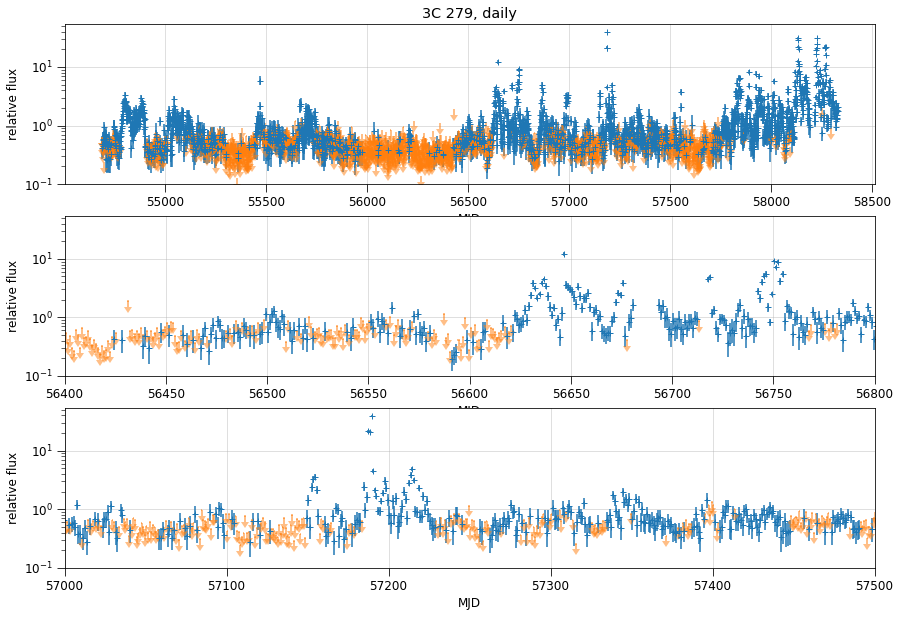

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,10))
lcp.flux_plot(ax=ax1, yscale='log', ylim=(0.1,None), title='3C 279, daily');
lcp.flux_plot(ax=ax2, yscale='log', ylim=(0.1,None), xlim=(56400, 56800), title=' ')
lcp.flux_plot(ax=ax3, yscale='log', ylim=(0.1,None), xlim=(57000, 57500), title=' ');

### Make Bayesian Block partitions, here using counts only|


In [4]:
bb = light_curve.BayesianBlocks(lcp)
%time edges =  bb.partition()

Partitioned 3565 cells into 201 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.MyFitness'> 
CPU times: user 639 ms, sys: 3 ms, total: 642 ms
Wall time: 645 ms


### Now make a light curve with the BB partitions, and plot that

In [5]:
lc =bb.light_curve(edges, min_exp=0.01)

Loaded 201 / 201 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 201 intervals
  columns: ['t', 'tw', 'counts', 'fexp', 'flux', 'errors', 'limit', 'ts', 'poiss'] 


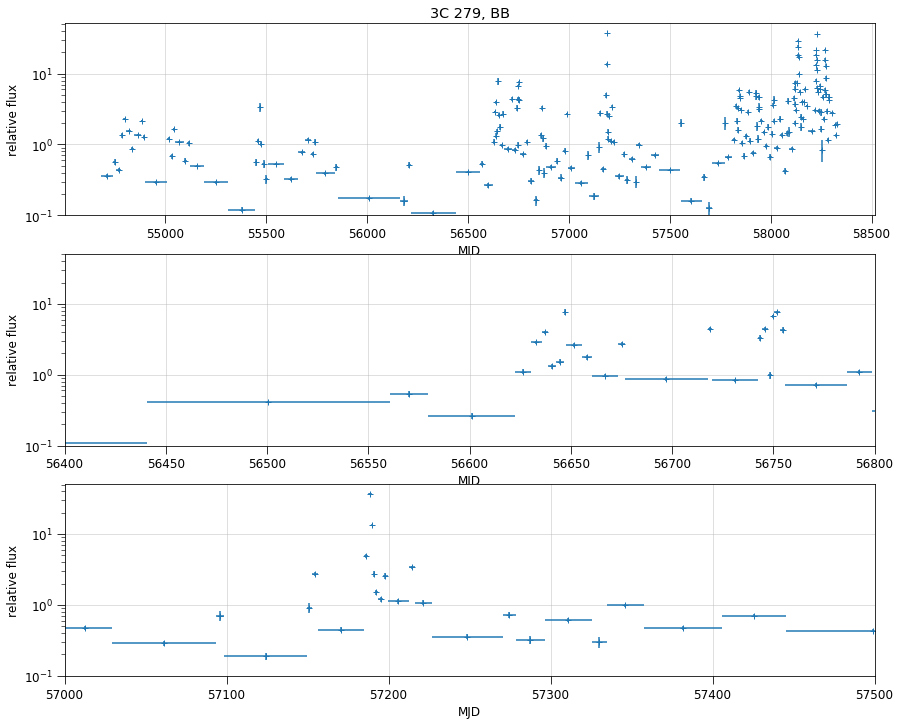

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,12))
lc.flux_plot(ax=ax1, yscale='log', ylim=(0.1,None), title='3C 279, BB');
lc.flux_plot(ax=ax2, yscale='log', ylim=(0.1,None), xlim=(56400, 56800), title=' ')
lc.flux_plot(ax=ax3, yscale='log', ylim=(0.1,None), xlim=(57000, 57500), title=' ');